In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("test2_result.csv")

In [97]:
df1.head()

,TRUE VALUE,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label,ap_clustering_label
0,1,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750,0,7
1,1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881,1,6
2,1,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204,0,7
3,1,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703,0,7
4,1,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333,0,0


In [98]:
# 数据中的分类类型数量
df1["TRUE VALUE"].value_counts()

 1    1488
-1     467
 0     317
Name: TRUE VALUE, dtype: int64

In [99]:
# data1是去掉真实分类信息的数据集（含有聚类后的结果）
data1 = df1.drop("TRUE VALUE", axis=1)
data1.head()

,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label,ap_clustering_label
0,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750,0,7
1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881,1,6
2,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204,0,7
3,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703,0,7
4,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333,0,0


In [100]:
df2 = pd.read_excel("Test_2.xlsx")

In [101]:
df2.head()

,TRUE VALUE,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %)
0,1,47.604,2.858,5.749,0.062,7.024,0.087,12.625,22.916,0.328,0.207900,0.061750
1,1,51.788,1.166,2.557,0.475,6.801,0.145,14.762,21.743,0.327,0.080071,0.014881
2,1,46.561,3.109,6.139,0.145,6.914,0.037,12.478,23.112,0.620,0.238984,0.023204
3,1,46.344,3.170,7.776,0.014,6.842,0.068,11.688,23.067,0.574,0.258931,0.049703
4,1,50.180,1.965,3.294,0.106,5.729,0.063,13.603,23.626,0.540,0.121500,0.019333


In [102]:
# 只含特征值的完整数据集
data2 = df2.drop("TRUE VALUE", axis=1)
# 只含真实分类信息的完整数据集
labels = df2["TRUE VALUE"]

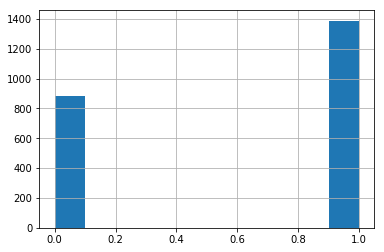

In [103]:
# 查看使用kmeans聚类后的分类标签值，两类
data1['km_clustering_label'].hist()

In [104]:
from sklearn.model_selection import StratifiedShuffleSplit

# 基于kmeans聚类结果的分层抽样
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data1, data1["km_clustering_label"]):
    strat_train_set = data1.loc[train_index]
    strat_test_set = data1.loc[test_index]

In [105]:
def clustering_result_propotions(data):
    """
    分层抽样后，训练集或测试集里不同分类标签的数量比
    
    :param data: 训练集或测试集，纯随机取样或分层取样
    """
    return data["km_clustering_label"].value_counts() / len(data)

In [106]:
# 分层抽样获取的测试集中，不同分类标签的数量比
clustering_result_propotions(strat_test_set)

1    0.610989
0    0.389011
Name: km_clustering_label, dtype: float64

In [107]:
# 分层抽样获取的训练集中，不同分类标签的数量比
clustering_result_propotions(strat_train_set)

1    0.610897
0    0.389103
Name: km_clustering_label, dtype: float64

In [108]:
# 完整的数据集中，不同分类标签的数量比
clustering_result_propotions(data1)

1    0.610915
0    0.389085
Name: km_clustering_label, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split

# 纯随机取样
random_train_set, random_test_set = train_test_split(data1, test_size=0.2, random_state=42)

# 完整的数据集、分层抽样后的测试集、纯随机抽样后的测试集中，不同分类标签的数量比
compare_props = pd.DataFrame({
    "Overall": clustering_result_propotions(data1),
    "Stratified": clustering_result_propotions(strat_test_set),
    "Random": clustering_result_propotions(random_test_set),
}).sort_index()

# 计算分层抽样和纯随机抽样后的测试集中不同分类标签的数量比，和完整的数据集中不同分类标签的数量比的误差
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Start. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Start. %error
0,0.389085,0.389011,0.382418,-1.713490,-0.018895
1,0.610915,0.610989,0.617582,1.091301,0.012034


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def get_classification_marks(model, data, labels, train_index, test_index):
    """
    获取分类模型（二元或多元分类器）的评分：F1值
    
    :param data: 只含有特征值的数据集
    :param labels: 只含有标签值的数据集
    :param train_index: 分层抽样获取的训练集中数据的索引
    :param test_index: 分层抽样获取的测试集中数据的索引
    :return: F1评分值
    """
    m = model(random_state=42)
    m.fit(data.loc[train_index], labels.loc[train_index])
    test_labels_predict = m.predict(data.loc[test_index])
    score = f1_score(labels.loc[test_index], test_labels_predict, average="weighted")
    return score

In [111]:
# 用分层抽样后的训练集训练分类模型后的评分值
start_marks = get_classification_marks(LogisticRegression, data2, labels, strat_train_set.index, strat_test_set.index)
start_marks

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.709029771874991

In [112]:
# 用纯随机抽样后的训练集训练分类模型后的评分值
random_marks = get_classification_marks(LogisticRegression, data2, labels, random_train_set.index, random_test_set.index)
random_marks

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7059927589215087

In [135]:
from sklearn.metrics import f1_score, r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone, BaseEstimator, TransformerMixin

class stratified_cross_val_score(BaseEstimator, TransformerMixin):
    """实现基于分层抽样的k折交叉验证"""
    
    def __init__(self, model, random_state=0, cv=5, pattern="classification"):
        """
        :model: 训练的模型（回归或分类）
        :random_state: 模型的随机种子值
        :cv: 交叉验证的次数
        :pattern: classification和regression两种选择
        """
        self.model = model
        self.random_state = random_state
        self.cv = cv
        self.pattern = pattern
        self.scores_ = []  
        self.best_score_ = []
        self.estimators_ = []
        self.best_estimator_ = []
        
        self.i = 0            
    
    def fit(self, X, y, layer_tag):
        """
        :param X: 只含有特征值的完整数据集
        :param y: 只含有标签值的完整数据集
        :param tag: 只含有分层依据的完整数据集（此例是KMeans聚类结果）
        
        """
        skfolds = StratifiedKFold(n_splits=self.cv, random_state=self.random_state)

        for train_index, test_index in skfolds.split(X, layer_tag):
            # 复制要训练的模型（分类或回归）
            clone_model = clone(self.model)
            strat_X_train_folds, strat_X_test_fold = X.iloc[train_index], X.iloc[test_index]
            strat_y_train_folds, strat_y_test_fold = y.iloc[train_index], y.iloc[test_index]
            
            # 训练模型
            clone_model.fit(strat_X_train_folds, strat_y_train_folds)
            # 保留模型
            self.estimators_.append(clone_model)
            # 预测值（这里是分类模型的分类结果）
            test_labels_pred = clone_model.predict(strat_X_test_fold)
            
            if self.pattern == "classification":
                # 分类模型用F1值
                score_fold = f1_score(y.iloc[test_index], test_labels_pred, average="weighted")
            elif self.pattern == "regression":
                # 回归模型使用r2值
                score_fold = r2_score(y.iloc[test_index], test_labels_pred)
            
            # 避免重复向列表里重复添加值
            if self.i < self.cv:
                self.scores_.append(score_fold)
            else:
                None
                
            self.i += 1
        
        # 获取评分最高模型的索引
        argmax  = np.argmax(self.scores_)
        self.best_score_ = self.scores_[argmax]
        self.best_estimator_ = self.estimators_[argmax]
        
    def transform(self, X, y=None):
        return self
    
    def mean(self):
        """返回交叉验证评分的平均值"""
        return np.array(self.scores_).mean()
    
    def std(self):
        """返回交叉验证评分的标准差"""
        return np.array(self.scores_).std()

In [136]:
from sklearn.linear_model import SGDClassifier, LinearRegression

# 分类模型
#clf_model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
# 回归模型
clf_model = LinearRegression()
# 基于分层抽样的交叉验证，pattern默认值为classification，如若是回归模型，需设置pattern为regression
clf_cross_val = stratified_cross_val_score(clf_model, cv=5, random_state=42, pattern="regression")
# data2是只含有特征值的完整数据集, labels是只含分类标签值的完整数据集，data1是含有特征值和聚类结果的完整数据集
clf_cross_val.fit(data2, labels, data1["km_clustering_label"])

In [137]:
# 每折交叉验证的评分
clf_cross_val.scores_

[0.26987105798643873,
 0.26073985257088084,
 0.2616565724572114,
 0.27419627001021774,
 -0.07388826753353173]

In [138]:
clf_cross_val.best_score_

0.27419627001021774

In [139]:
# 交叉验证评分的平均值
clf_cross_val.mean()

0.1985150970982434

In [129]:
# 交叉验证评分的标准差
clf_cross_val.std()

0.13629502724197853

In [140]:
# 五折交叉验证的所有模型
clf_cross_val.estimators_

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)]

In [141]:
# 五折交叉验证中的最优模型
clf_cross_val.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)